# Data Visualization using Python

# Overview

Being a popular finance journalist of Europe, everyone is waiting for the IT Salary Survey report you release every 3 years. The IT sector is booming and the younger aspirants keep themselves updated with the trends by the beautiful visualizations your report contains. 

Given the survey data from 2018 - 2020, it’s time to put your creative hat on and lay out insightful visualizations for the masses.

### Objective

The objective is to analyze the survey data and generate insightful visualizations.

## Loading the Data sets

In [1]:
import pandas as pd                                   # Importing Panda as the required library for Data Analysis

In [2]:
data_18 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/IT_Salary_Survey_EU_18-20/Survey_2018.csv') # Using panda csv read function to read the csv files from its respective URL
data_19 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/IT_Salary_Survey_EU_18-20/Survey_2019.csv')
data_20 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/IT_Salary_Survey_EU_18-20/Survey_2020.csv')

## Data Analysis

In this section, I aim to show key attributes of the data as well as discover the cleaning actions required to achieve the desired result. This process is called Data Aggregation

In [3]:
data_18.head(5) # Displaying First 5 rows of the 2018 survey data

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [5]:
data_20.info()    # Using the info() method to get concise inforrmation about the 2020 survey data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

* The 2020 survey data has 4 floats columns and 19 object columns, no other data type is displayed.

* A number of columns with numeric values seem to contain multiple data type values.

* More Variable Columns, which were not in the 2018 data survey, were added to the 2020 data survey.


In [6]:
data_18.describe()  # Displaying a descriptive statistical summary about the numeric columns in the 2018 survey data

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
count,672.000000,732.000000,750.000000,596.000000,463.000000
mean,32.183036,8.548497,68381.765333,62187.278523,58013.475162
std,5.107268,4.729557,21196.306557,20163.008663,20413.048908
min,21.000000,0.000000,10300.000000,10001.000000,10001.000000
25%,29.000000,5.000000,57000.000000,52000.000000,48000.000000
50%,32.000000,8.000000,65000.000000,60000.000000,56000.000000
75%,35.000000,11.000000,75000.000000,70000.000000,67000.000000
max,60.000000,38.000000,200000.000000,200000.000000,150000.000000


In [7]:
null_columns18=data_18.isnull().sum()
print(null_columns18) 
print("\nTotal Sum of Null values in the 2018 Data Set is ",null_columns18.sum())

Timestamp                               0
Age                                    93
Gender                                 14
City                                   29
Position                               28
Years of experience                    33
Your level                             22
Current Salary                         15
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                  15
Company size                           15
Company type                           35
dtype: int64

Total Sum of Null values in the 2018 Data Set is  793


In [8]:
print("In 2018, there were", len(data_18), "responses.") # Checking the number of response by checking the number of rows of each yearly data survey.
print("In 2019, there were", len(data_19), "responses.")
print("In 2020, there were", len(data_20), "responses.")

In 2018, there were 765 responses.
In 2019, there were 991 responses.
In 2020, there were 1253 responses.


* From the above result, I observed that the number of people that responded to the survey, over the span of 3 years, have increased annually.

In [9]:
pd.value_counts(data_20['Number of vacation days'])  # To Check frequency of each unique value in the Number of Vacation Column form the 2020 data survey.

30                                              488
28                                              233
27                                              102
25                                               91
26                                               71
24                                               67
29                                               24
20                                               13
21                                               10
32                                                8
22                                                8
31                                                8
35                                                5
36                                                5
0                                                 4
23                                                4
40                                                4
unlimited                                         3
33                                                3
14          

* In the display of unique values in the 2020 data, I observe that the column, 'Number of vacation days', has multiple NaN values which have already been filled in with different unique values.
* I also observe that some numeric unique values contain characters attached to them.

## Data Cleaning

In this section, I corrected some misspelling, filled in missing values and did some feature selection.

In [10]:
data_20.columns # first I display all column name

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [11]:
data_20.rename(columns={'Position ':'Position'},inplace=True) # I use the rename function to remove the whitespace in the position column.

In [12]:
data_20.columns # I take a look at column names to view the changes made. 

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 202

In [13]:
null_columns20=data_20.isnull().sum()   # I use the isnull() method to check for the number of null values in each column and calculated the sum of each column, I store the result in a variable called null_columns
print(null_columns20)   # I print out the result of each columns and the total sum of null values.
print("\nTotal Sum if Null values in the 2020 Data Set is ",null_columns20.sum())   # Here I display the total Null values in the dataset.

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [14]:
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [15]:
#To fill in null values, I check the type of each column and assign the correct fill in for null
for s in data_20.columns[data_20.dtypes == object]:
    data_20[s] = data_20[s].fillna('MISSING')
for x in data_20.columns[data_20.dtypes == 'float64']:
    data_20[x] = data_20[x].fillna('-9999')
data_20.isnull().sum()


Timestamp                                                                                                                  0
Age                                                                                                                        0
Gender                                                                                                                     0
City                                                                                                                       0
Position                                                                                                                   0
Total years of experience                                                                                                  0
Years of experience in Germany                                                                                             0
Seniority level                                                                                                            0


In [16]:
# I use the head() function to check the first two rows of each year (2018,2019,2020)
print(data_18.head(2))

             Timestamp   Age Gender     City                       Position  \
0  14/12/2018 12:41:33  43.0      M  München                   QA Ingenieur   
1  14/12/2018 12:42:09  33.0      F  München  Senior PHP Magento developer    

   Years of experience Your level  Current Salary  Salary one year ago  \
0                 11.0     Senior         77000.0              76200.0   
1                  8.0     Senior         65000.0              55000.0   

   Salary two years ago Are you getting any Stock Options?  \
0               68000.0                                 No   
1               55000.0                                 No   

  Main language at work Company size Company type  
0               Deutsch     100-1000      Product  
1               Deutsch       50-100      Product  


In [17]:
print(data_19.head(2))

           Zeitstempel   Age Gender    City Seniority level  \
0  02.12.2019 11:18:26  33.0   Male  Berlin          Senior   
1  02.12.2019 11:18:35  29.0   Male  Berlin          Middle   

  Position (without seniority)  Years of experience  \
0          Fullstack Developer                   13   
1            Backend Developer                    3   

  Your main technology / programming language  \
0                                         PHP   
1                                      Python   

   Yearly brutto salary (without bonus and stocks)  Yearly bonus  ...  \
0                                          64000.0        1000.0  ...   
1                                          55000.0           NaN  ...   

   Yearly stocks one year ago. Only answer if staying in same country  \
0                                                NaN                    
1                                                NaN                    

   Number of vacation days  Number of home office days p

In [18]:
print(data_20.head(2))

             Timestamp   Age Gender    City           Position  \
0  24/11/2020 11:14:15  26.0   Male  Munich  Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin  Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   

  Your main technology / programming language  \
0                                  TypeScript   
1                                        Ruby   

  Other technologies/programming languages you use often  ...  \
0                    Kotlin, Javascript / Typescript      ...   
1                                            MISSING      ...   

   Annual bonus+stocks one year ago. Only answer if staying in same country  \
0                                              10000                          
1                                               5000            

In [19]:
# I make of the the drop() function to remove the Timestamp Column
data_18=data_18.drop('Timestamp',axis=1)
data_19=data_19.drop('Zeitstempel',axis=1)
data_20=data_20.drop('Timestamp',axis=1)
print("2018 survey Data without the Timestamp column\n\n")
print(data_18.head(2))
print("\n\n\n2019 survey Data without the Timestamp column\n")
print(data_19.head(2))
print("\n\n\n2020 survey Data without the Timestamp column\n")
print(data_20.head(2))

2018 survey Data without the Timestamp column


    Age Gender     City                       Position  Years of experience  \
0  43.0      M  München                   QA Ingenieur                 11.0   
1  33.0      F  München  Senior PHP Magento developer                   8.0   

  Your level  Current Salary  Salary one year ago  Salary two years ago  \
0     Senior         77000.0              76200.0               68000.0   
1     Senior         65000.0              55000.0               55000.0   

  Are you getting any Stock Options? Main language at work Company size  \
0                                 No               Deutsch     100-1000   
1                                 No               Deutsch       50-100   

  Company type  
0      Product  
1      Product  



2019 survey Data without the Timestamp column

    Age Gender    City Seniority level Position (without seniority)  \
0  33.0   Male  Berlin          Senior          Fullstack Developer   
1  29.0   Male  Ber

## Data Visualization using Plotly

In [20]:
import numpy as np
import plotly.express as px                      # Import Plotly libraries required
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

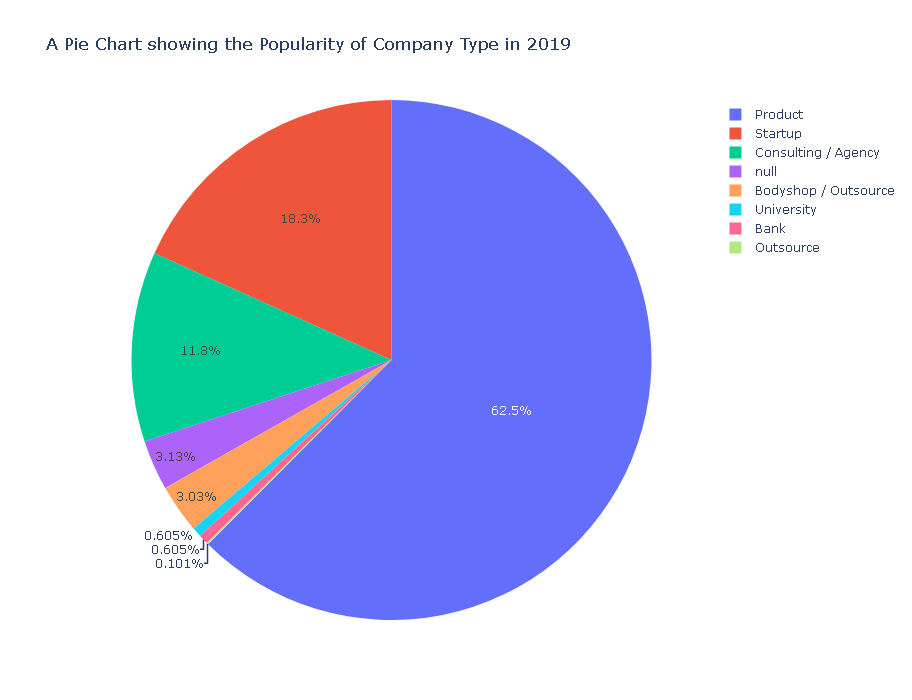

In [54]:
# Here, I make use of plotly express to show a simple plot of what Company type is most popular in 2019.
fig = px.pie(data_19,names='Company type',
             title='A Pie Chart showing the Popularity of Company Type in 2019',
            width = 600,
             height = 700
            )
fig.show()

In [22]:
# In order to coerce the Yearly Salary Column into a  numeric, type, I have to remove string characters  
data_20['Yearly brutto salary (without bonus and stocks) in EUR'] = pd.to_numeric(data_20['Yearly brutto salary (without bonus and stocks) in EUR'].astype(str).str[:-1], errors='coerce')

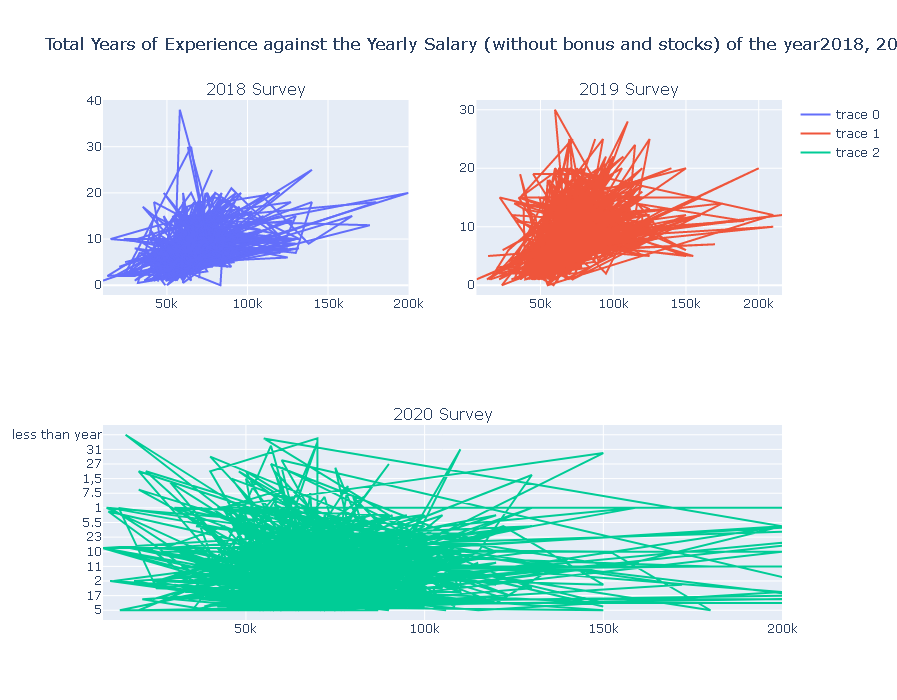

In [25]:
# Here, I make use of Plotly's Graph Objects to show the Total Years of Experience against Yearly Salary.

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}], [{"colspan": 2}, None]],
    subplot_titles=("2018 Survey","2019 Survey", "2020 Survey"))

fig.append_trace(go.Scatter(
    x=data_18['Current Salary'],
    y= data_18['Years of experience'],
    mode='lines'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=data_19['Yearly brutto salary (without bonus and stocks)'],
    y=data_19['Years of experience'],
    mode='lines'
), row=1, col=2)

fig.append_trace(go.Scatter(
    x=data_20['Yearly brutto salary (without bonus and stocks) in EUR'],
    y=data_20['Total years of experience'],
    mode='lines'
), row=2, col=1)

fig.update_xaxes( range=[10000,200000], row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="Total Years of Experience against the Yearly Salary (without bonus and stocks) of the year2018, 2019 and 2020")

fig.show()

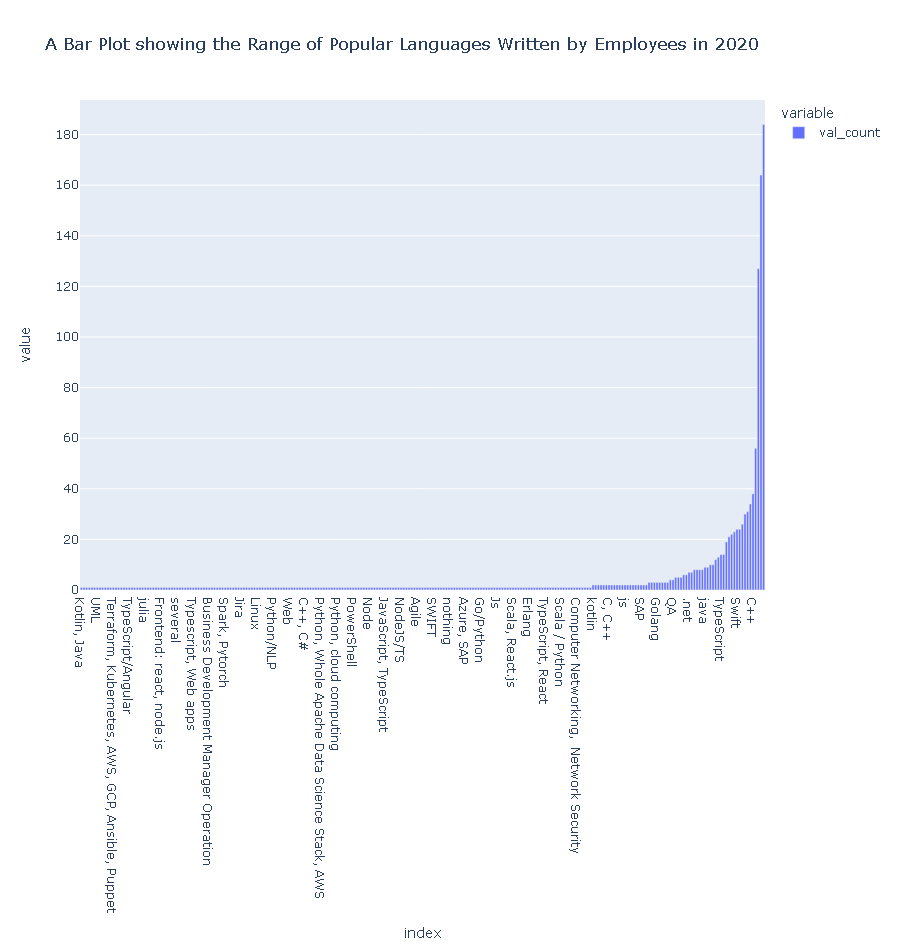

In [51]:
# First I creat a Dataframe from the Language column of the 2020 survey data 
# Then I rename the column and plot the data.
Lang_col=data_20['Your main technology / programming language']
res = Counter(Lang_col)
sort_v =dict(res)
lang_series=pd.Series(sort_v)
lang_df = pd.DataFrame(lang_series)
lang_df.rename(columns={0:'val_count'},inplace=True)

fig = px.bar(lang_df.sort_values(by='val_count'),
             title='A Bar Plot showing the Range of Popular Languages Written by Employees in 2020',
            height = 950,
             width = 900
            )
fig.show()

* From the graph above, We see that the most popular language in 2020, according to respondents of the survey, is Python and the least popular is a combination of Kotlin and Java

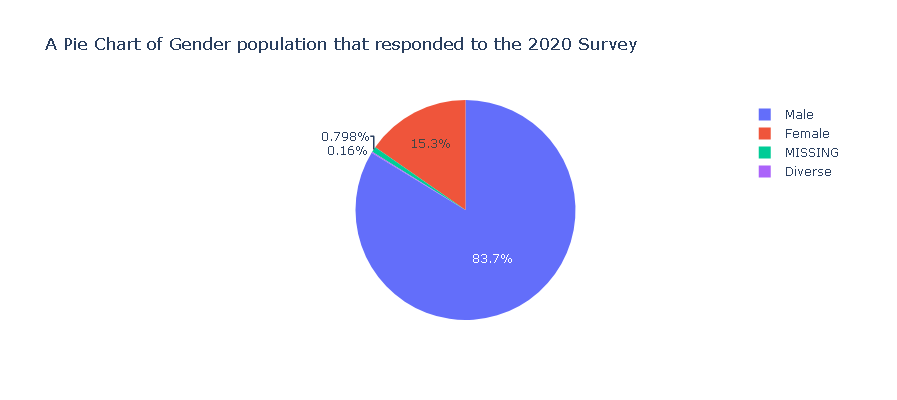

In [39]:
# The pie chart shows the gender ratio of the respondents in the year 2020 
fig = px.pie(data_20,'Gender',title='A Pie Chart of Gender population that responded to the 2020 Survey',width=500,height=400)
fig.show()

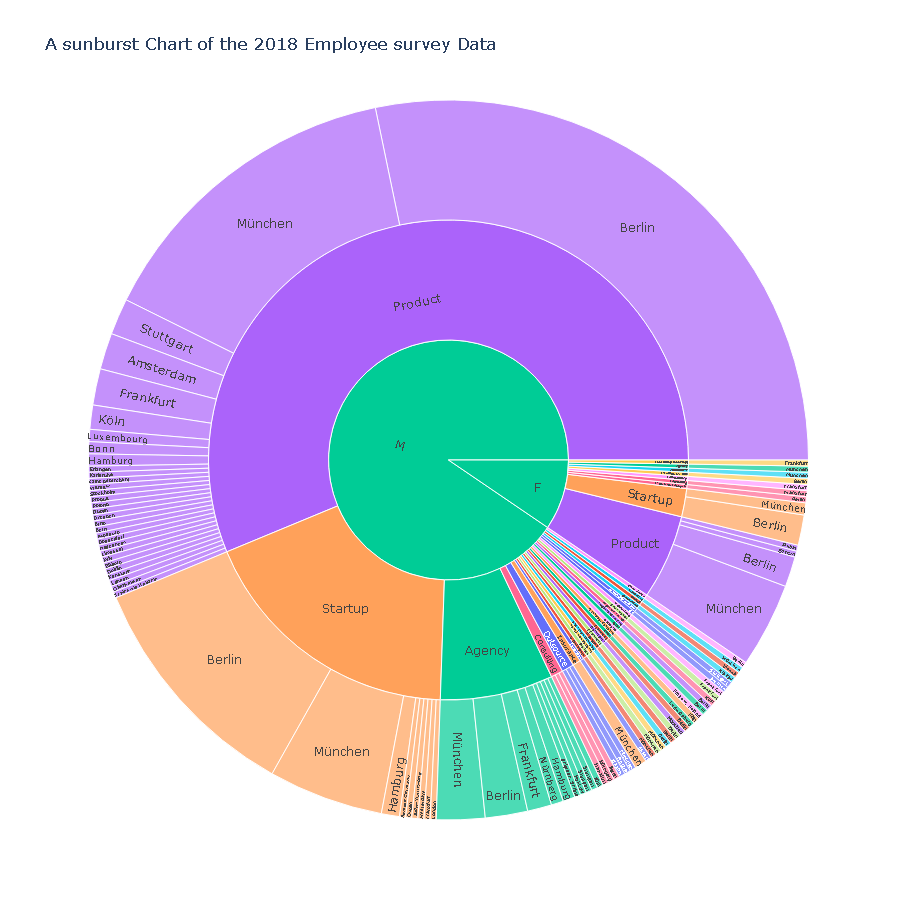

In [38]:
# A sunburst showing the 2018 survey

fig = px.sunburst(data_18.dropna(), 
                  path=['Gender','Company type','City'], 
                  color='Company type', 
                  hover_data=['Main language at work'],
                  title= 'A sunburst Chart of the 2018 Employee survey Data ',
                  width=950,
                  height = 900,
                 )

fig.show()

From the sunburst of 2018 survey, we see that the male were more responsive than females. Also the males were more popular with Product, Startup, and Agency Company Type which were mostly located in Berlin and münchen.

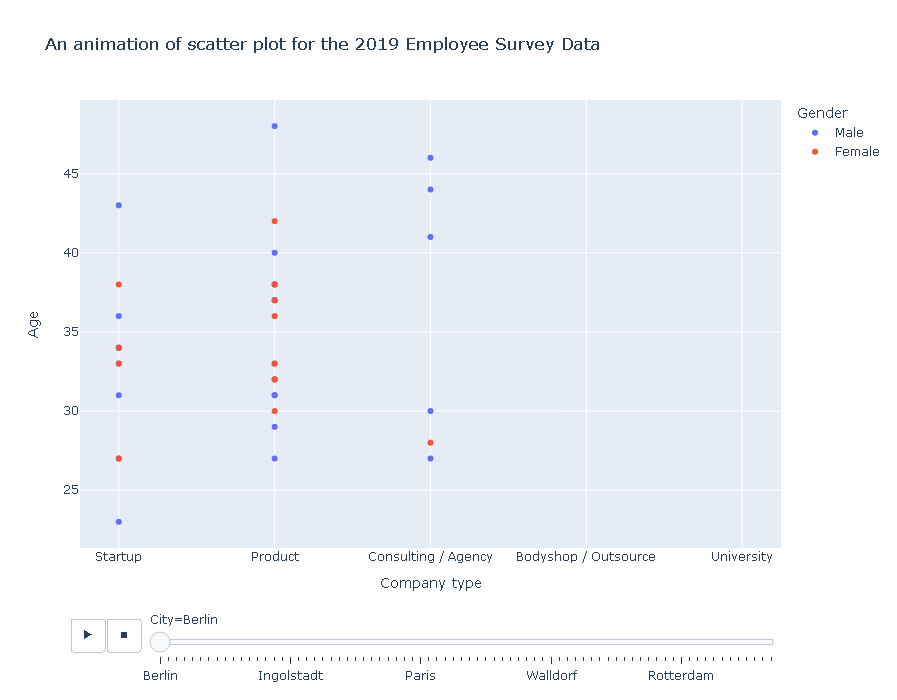

In [47]:
#For the 2019 survey, I wanted to capture as much as I can with an animated Scatter Plot

fig=px.scatter(data_19,
               x="Company type", 
               y="Age", 
               animation_frame="City", 
               animation_group="Your main technology / programming language", 
               color="Gender",
               title='An animation of scatter plot for the 2019 Employee Survey Data',
               height = 700,
               width=900
              )
fig.show()

From the scatter plot, we see that a lot of the respondents, which are mostly males, with age between 25 to 40, aal specialize mostly in startup, Product and Consulting/ Agency Company Type and a large number of them are located between Berlin and London. 

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [34]:
data_20['Age'] = pd.to_numeric(data_20['Age'].astype(str).str[:-1], errors='coerce')
data_20['Age'][data_20["Age"] <= 28] = 28

data_20['Total years of experience'] = pd.to_numeric(data_20['Total years of experience'].astype(str).str[:-1], errors='coerce')

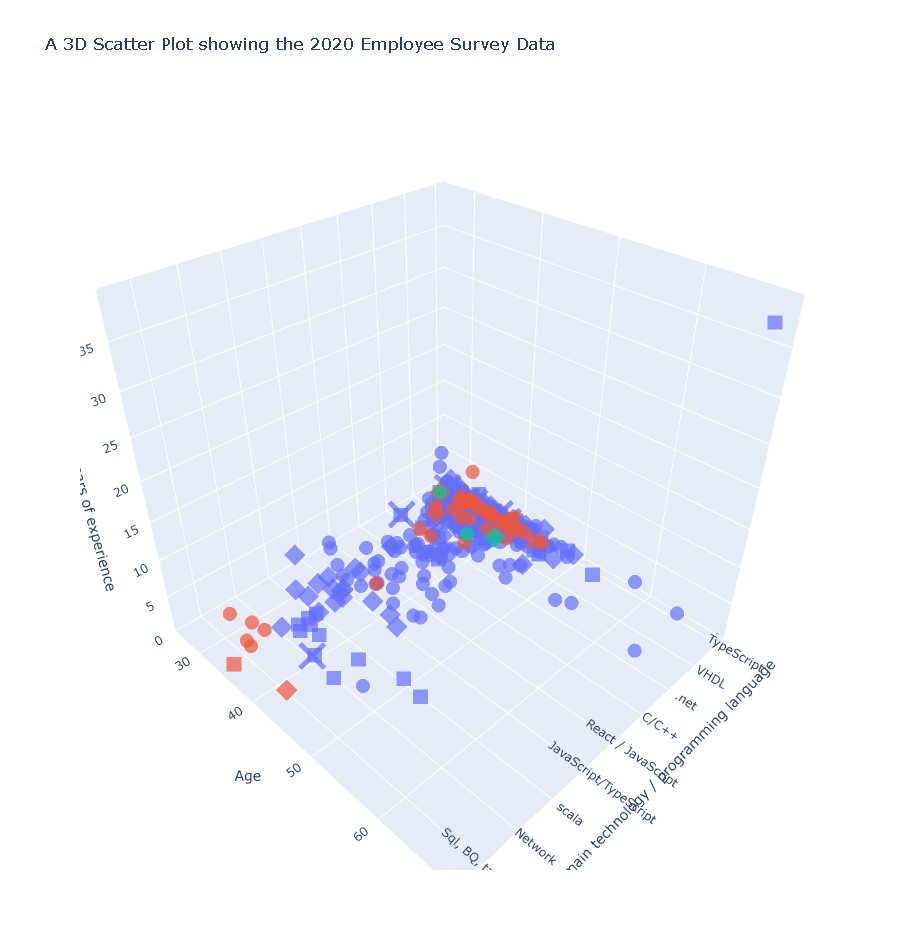

In [52]:
# A 3d Scatter plot of te 2020 survey data
fig = px.scatter_3d(data_20, 
                    x='Your main technology / programming language', 
                    y='Age', 
                    z='Total years of experience',
                    color='Gender',
                    symbol='Company type' ,
                    opacity=0.7,
                    range_y =[25,70],
                    range_z=[0,40],
                    title='A 3D Scatter Plot showing the 2020 Employee Survey Data',
                    width=900,
                    height= 950
                   )
fig.update_layout(showlegend=False)
fig.show()

From the 3d Scatter Plot, we can see that in 2020, most employess have only 0 to 4 years of experience with the exception of a male aged 69, whom's company type is a consultin Agency. 